In [188]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [189]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(mean=[0, 3], cov=[[1, 0.5], [0.5, 1]], size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean=[3, 0], cov=[[1, 0.5], [0.5, 1]], size=num_samples_per_class)

In [190]:
inputs = np.vstack((negative_samples, positive_samples)).astype("float32")
targets = np.vstack((np.zeros(num_samples_per_class), np.ones(num_samples_per_class))).astype("float32")
targets = targets.reshape(2000,)

<Axes: >

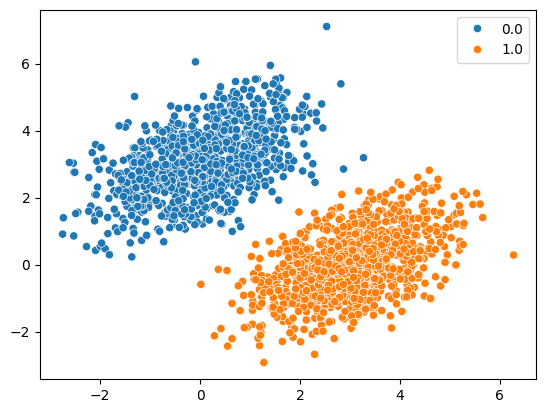

In [191]:
plt.figure()
sns.scatterplot(x=inputs[:,0], y=inputs[:,1], hue=targets)

In [192]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.random.uniform(shape=(output_dim, )))

In [193]:
def model(x):
  return tf.sigmoid(tf.matmul(x, W) + b)

In [194]:
def loss_function(target, predict):
  return tf.keras.losses.binary_crossentropy(target, predict)

In [199]:
learning_rate = 0.001
def training_step(x, targets):
  with tf.GradientTape() as tape:
    predictions = model(x)
    loss = loss_function(targets, predictions)
  grad_W, grad_b = tape.gradient(loss, [W, b])
  W.assign_sub(learning_rate*grad_W)
  b.assign_sub(learning_rate*grad_b)
  return loss

In [222]:
for step in range(2):
  loss = training_step(inputs, targets)
  print(f"step - {step}, loss - {loss}")

step - 0, loss - [7.7124753 7.7124753 5.120974  ... 4.970879  7.7124753 7.7124753]
step - 1, loss - [1.0042148 0.7309642 2.4859033 ... 3.696604  4.4827957 2.520213 ]


In [223]:
predictions = model(inputs)
predictions[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.7344277e-05],
       [2.1232179e-04],
       [1.6422588e-08],
       [5.6521893e-10],
       [3.7561251e-06],
       [1.4935982e-07],
       [4.1939063e-07],
       [1.1167117e-05],
       [3.2180555e-08],
       [1.8690954e-10]], dtype=float32)>

<Axes: >

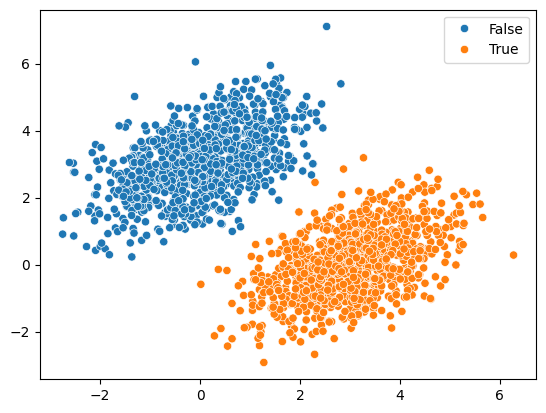

In [224]:
plt.figure()
sns.scatterplot(x=inputs[:,0], y=inputs[:,1], hue=predictions[:,0] > 0.5)